In [1]:
import numpy as np  #linear algebra
import pandas as pd  #data processing


# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('kaggle/input'):
  for filename in filenames:
    print(os.path.join(dirname,filename))


In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
df = pd.read_csv('/content/fifa_eda.csv')
df.shape

(18207, 18)

In [5]:
df.head()

,ID,Name,Age,Nationality,Overall,Potential,Club,Value,Wage,Preferred Foot,International Reputation,Skill Moves,Position,Joined,Contract Valid Until,Height,Weight,Release Clause
0,158023,L. Messi,31,Argentina,94,94,FC Barcelona,110500.0,565.0,Left,5.0,4.0,RF,2004,2021-01-01,5.583333,159.0,226500.0
1,20801,Cristiano Ronaldo,33,Portugal,94,94,Juventus,77000.0,405.0,Right,5.0,5.0,ST,2018,2022-01-01,6.166667,183.0,127100.0
2,190871,Neymar Jr,26,Brazil,92,93,Paris Saint-Germain,118500.0,290.0,Right,5.0,5.0,LW,2017,2022-01-01,5.750000,150.0,228100.0
3,193080,De Gea,27,Spain,91,93,Manchester United,72000.0,260.0,Right,4.0,1.0,GK,2011,2020-01-01,6.333333,168.0,138600.0
4,192985,K. De Bruyne,27,Belgium,91,92,Manchester City,102000.0,355.0,Right,4.0,4.0,RCM,2015,2023-01-01,5.916667,154.0,196400.0


In [6]:
# What this function does ?
# it will show the number of null values in the data set
# What is the meaning of value of 241 against the Club?
#total 241 rows are missing club values
# Why we are finding null values?
# To know the accuracy of the data
# What is meaning of sum?
# total number of missing values

df.isnull().sum()

ID                            0
Name                          0
Age                           0
Nationality                   0
Overall                       0
Potential                     0
Club                        241
Value                       252
Wage                          0
Preferred Foot                0
International Reputation     48
Skill Moves                  48
Position                      0
Joined                        0
Contract Valid Until        289
Height                        0
Weight                        0
Release Clause                0
dtype: int64

In [7]:
df.isnull()

,ID,Name,Age,Nationality,Overall,Potential,Club,Value,Wage,Preferred Foot,International Reputation,Skill Moves,Position,Joined,Contract Valid Until,Height,Weight,Release Clause
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18202,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
18203,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
18204,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
18205,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [8]:
for f in df.columns:
  print(f,df[f].nunique())

ID 18207
Name 17194
Age 29
Nationality 164
Overall 48
Potential 47
Club 651
Value 216
Wage 144
Preferred Foot 2
International Reputation 5
Skill Moves 5
Position 27
Joined 22
Contract Valid Until 35
Height 22
Weight 58
Release Clause 1245


In [9]:
print(df['Nationality'])

0        Argentina
1         Portugal
2           Brazil
3            Spain
4          Belgium
           ...    
18202      England
18203       Sweden
18204      England
18205      England
18206      England
Name: Nationality, Length: 18207, dtype: object


25.0


<Axes: xlabel='Age', ylabel='Count'>

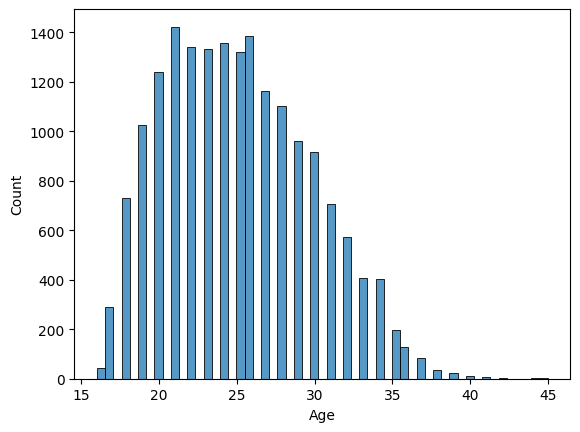

In [12]:
print(df['Age'].median())
sns.histplot(x='Age',data=df)


<Axes: xlabel='Preferred Foot', ylabel='count'>

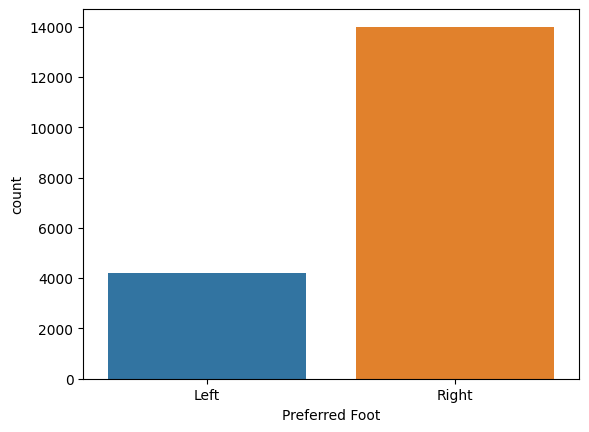

In [13]:
sns.countplot(x='Preferred Foot',data=df)

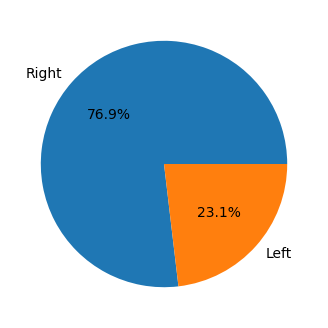

In [16]:
plt.subplots(figsize=(4,4))
plt.pie(df["Preferred Foot"].value_counts(), labels=["Right","Left"],autopct="%1.1f%%")
plt.show()

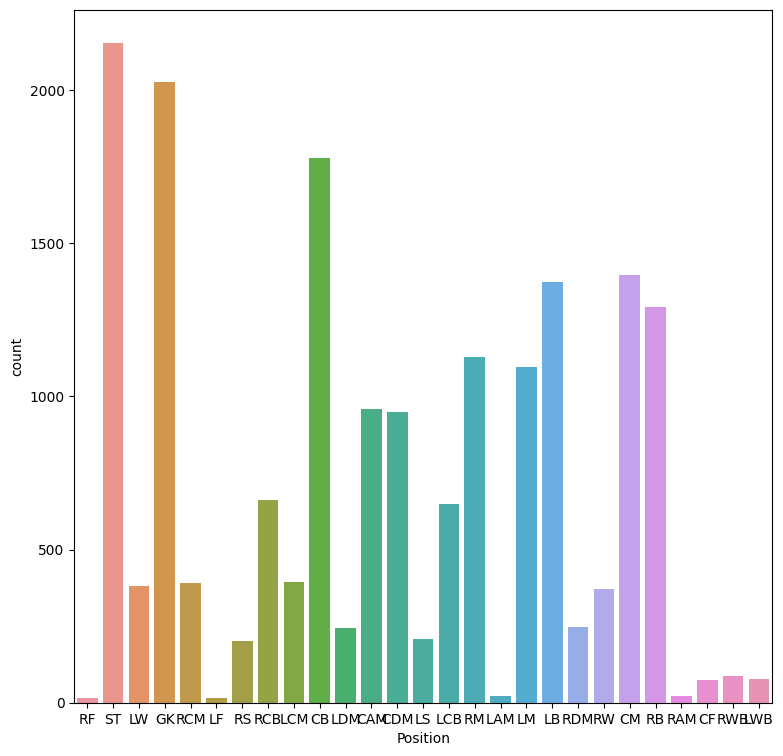

In [17]:
plt.subplots(figsize=(9,9))
sns.countplot(x="Position",data = df)
plt.show()

<Axes: xlabel='International Reputation', ylabel='count'>

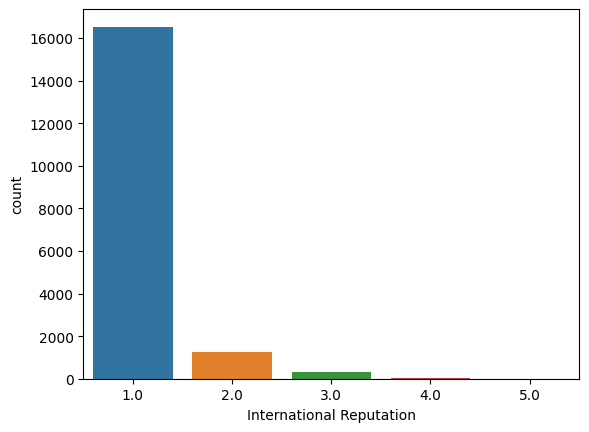

In [18]:
sns.countplot(x='International Reputation',data=df)

<Axes: xlabel='Skill Moves', ylabel='count'>

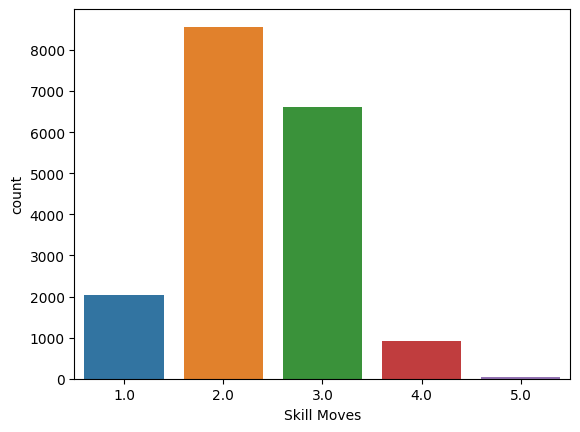

In [19]:
sns.countplot(x='Skill Moves',data=df)

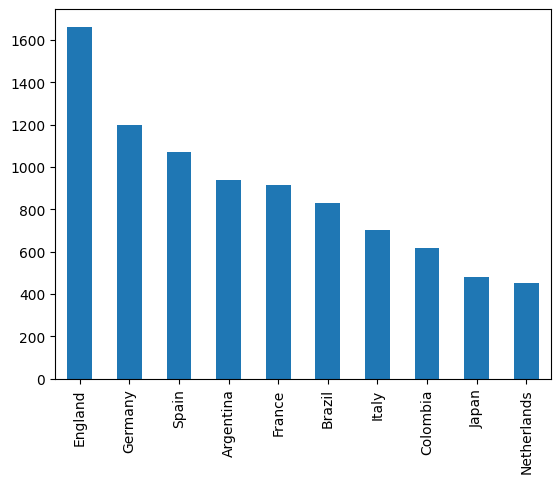

In [20]:
national = df['Nationality'].value_counts()[:10]
national.plot.bar()
plt.show()

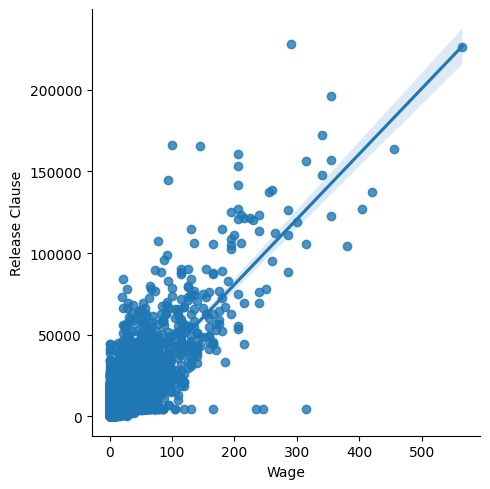

In [21]:
sns.lmplot(x='Wage',y='Release Clause',data=df)

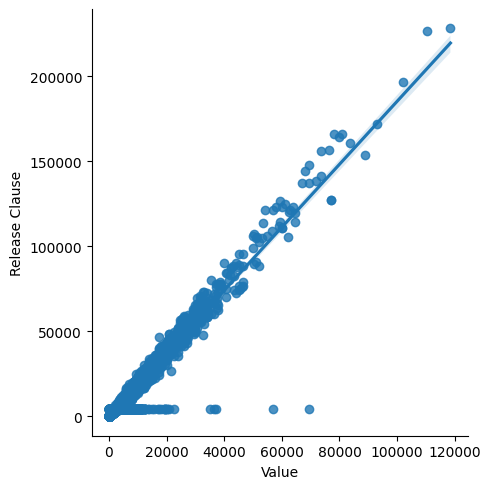

In [22]:
sns.lmplot(x='Value',y='Release Clause',data=df)

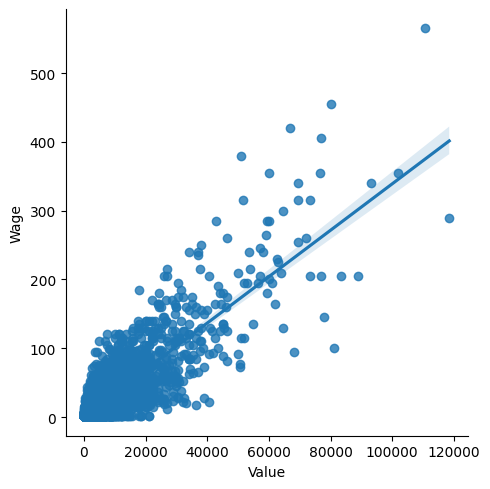

In [23]:
sns.lmplot(x='Value',y='Wage',data=df)

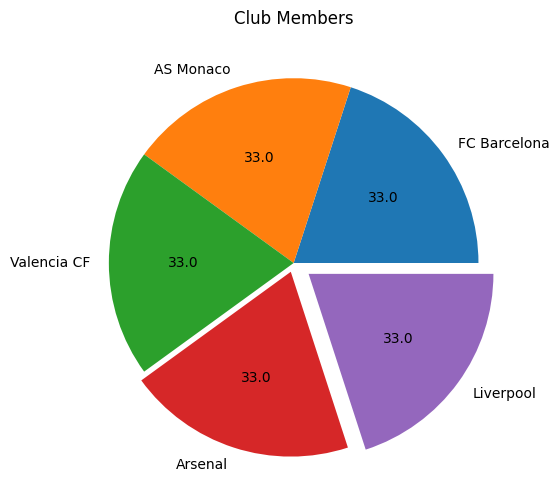

In [29]:
plt.subplots(figsize=(6,6))
size = df["Club"].value_counts().sort_values(ascending = False).head(5)
def value(val):
  x = np.round(val/100.*size.sum())
  return x
plt.pie(size, labels = size.index, autopct = value, explode = [0,0,0,0.05,0.1])
plt.title("Club Members")
plt.show()

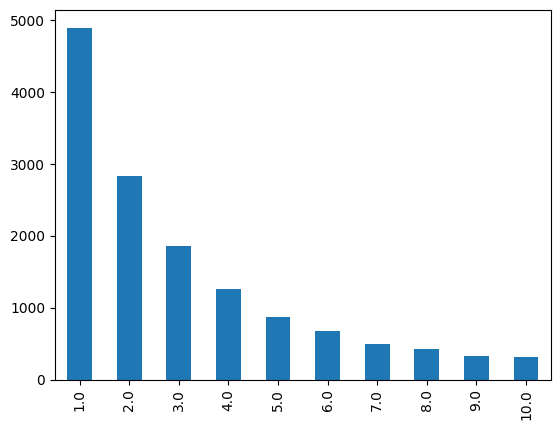

In [30]:
national = df['Wage'].value_counts()[:10]
national.plot.bar()
plt.show()